<a href="https://colab.research.google.com/github/pcshivam/python-we-01-30/blob/main/Abhijit_Project_Extended_Warranty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
data = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [ ]:
df_dataset = pd.read_excel('Dataset.xlsx',sheet_name=['Customers'])
df_customers = df_dataset['Customers']

<Axes: xlabel='State', ylabel='count'>

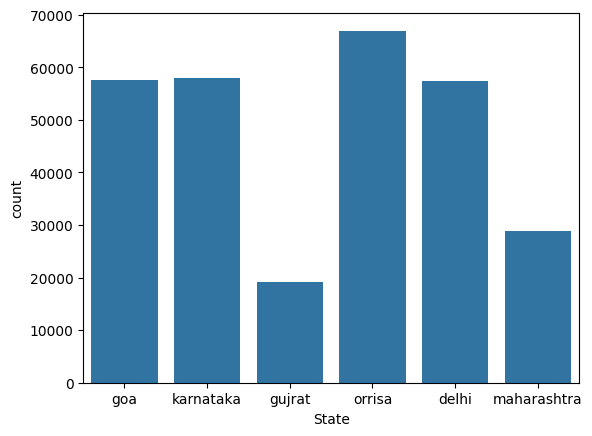

In [ ]:
sns.countplot(data = df_customers,x = df_customers['State'])

In [ ]:
df_dataset1 = pd.read_excel('Dataset.xlsx',sheet_name=['Claims'])
df_claims = df_dataset1['Claims']

<Axes: xlabel='Part_ID', ylabel='count'>

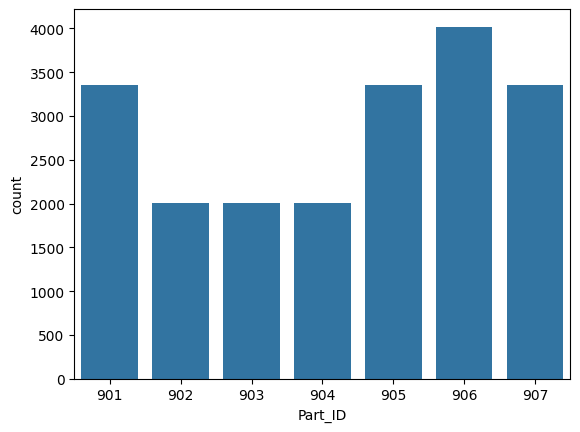

In [ ]:
sns.countplot(data = df_claims,x = df_claims['Part_ID'])

USE CASES:
1) Monthly report of top ten Dealers and parts that has been failed:

In [ ]:
df_claims['year_month'] = df_claims['claim_date'].dt.to_period('M')
monthly_claims_count = df_claims.groupby(['year_month', 'Dealer_ID']).size().reset_index(name='claims_count')
claims_ = monthly_claims_count.pivot(index='year_month', columns='Dealer_ID', values='claims_count').fillna(0)
print(claims_)

Dealer_ID    1      2      3      4      5      6      15     1210   1211  \
year_month                                                                  
2020-04      63.0   63.0   63.0   15.0   66.0   27.0   12.0   12.0   12.0   
2020-05       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-06       5.0    5.0    5.0    1.0    5.0    2.0    1.0    0.0    0.0   
2020-07       0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0   
2020-08       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-09       1.0    1.0    2.0    2.0    2.0    2.0    0.0    0.0    0.0   
2020-10       5.0    5.0    4.0    0.0    5.0    1.0    1.0    0.0    0.0   
2020-11       0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0   
2020-12       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2021-01     848.0  848.0  848.0  200.0  893.0  362.0  162.0  162.0  162.0   

Dealer_ID    1212  ...   1986   1987   1988   1989   1990   1991   1992  \


In [ ]:
df_claims['year_month'] = df_claims['claim_date'].dt.to_period('M')
monthly_parts_count = df_claims.groupby(['year_month', 'Part_ID']).size().reset_index(name='parts_count')
parts_ = monthly_parts_count.pivot(index='year_month', columns='Part_ID', values='parts_count').fillna(0)
print(parts_)

Part_ID      901   902   903   904   905   906   907
year_month                                          
2020-04      224   134   135   134   223   268   222
2020-05        5     3     3     3     5     7     5
2020-06        5     3     3     3     5     6     5
2020-07        5     3     3     3     5     6     6
2020-08        5     3     3     3     6     6     5
2020-09        5     3     3     3     5     6     5
2020-10        5     3     3     4     5     6     5
2020-11        5     3     3     3     5     6     5
2020-12        5     4     3     3     5     6     5
2021-01     3085  1851  1851  1851  3085  3702  3085


USE CASES:
2) Predict the parts that may fail according to the location, mileage and age:

data processing

In [ ]:
df1 = pd.DataFrame()
df1['Part_ID'] = df_claims['Part_ID']
df2 = pd.merge(df_claims ,df_customers,on = 'Cust_ID')
pd.options.mode.copy_on_write = True
df1['State'] = df2['State'].reset_index(drop=True)
df1

,Part_ID,State
0,901,orrisa
1,902,orrisa
2,903,orrisa
3,904,orrisa
4,905,orrisa
...,...,...
20090,906,delhi
20091,907,karnataka
20092,905,karnataka
20093,904,karnataka


In [ ]:
import random
lst = []
for i in range(0,20095):
    lst.append(random.randint(10000,30000))
df1['Km'] = lst
lst1 = []
for i in range(0,20095):
  lst1.append(random.randint(1,10))
df1['Age'] = lst1
df1


,Part_ID,State,Km,Age,failure,delhi,goa,gujrat,karnataka,maharashtra,orrisa
0,901,orrisa,19370,4,1,False,False,False,False,False,True
1,902,orrisa,11583,5,1,False,False,False,False,False,True
2,903,orrisa,26036,3,1,False,False,False,False,False,True
3,904,orrisa,13660,10,1,False,False,False,False,False,True
4,905,orrisa,21895,1,1,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
20090,906,delhi,28407,5,1,True,False,False,False,False,False
20091,907,karnataka,23961,10,1,False,False,False,True,False,False
20092,905,karnataka,18124,5,0,False,False,False,True,False,False
20093,904,karnataka,13649,10,1,False,False,False,True,False,False


In [ ]:
def failure_rule(df1):
    if df1['Age'] > 7 or df1['Km'] > 25000 and df1['Part_ID'] in [907]:
        return 1
    elif (df1['State'] in ['orrisa','delhi']) and (df1['Age'] > 5 or df1['Km'] >20000 or df1['Part_ID'] in [906,905] ):
        return 1
    else:
        return 0


df1['failure'] = df1.apply(failure_rule, axis=1)

In [ ]:
df1['failure'].value_counts()

,count
failure,
1,11055
0,9040


In [ ]:
df1 = pd.concat([df1,pd.get_dummies(df1['State'])],axis = 1)


In [ ]:
df1

,Part_ID,State,Km,Age,failure,delhi,goa,gujrat,karnataka,maharashtra,orrisa
0,901,orrisa,19370,4,0,False,False,False,False,False,True
1,902,orrisa,11583,5,0,False,False,False,False,False,True
2,903,orrisa,26036,3,1,False,False,False,False,False,True
3,904,orrisa,13660,10,1,False,False,False,False,False,True
4,905,orrisa,21895,1,1,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
20090,906,delhi,28407,5,1,True,False,False,False,False,False
20091,907,karnataka,23961,10,1,False,False,False,True,False,False
20092,905,karnataka,18124,5,0,False,False,False,True,False,False
20093,904,karnataka,13649,10,1,False,False,False,True,False,False


building the logistic regression model

In [ ]:
from google.colab import files
data = files.upload()

Saving vehicle_parts_failure.xlsx to vehicle_parts_failure.xlsx


In [ ]:
df1 = pd.read_excel('vehicle_parts_failure.xlsx')

In [ ]:
df1

,Part_ID,State,Km,Age,failure,delhi,goa,gujrat,karnataka,maharashtra,orrisa
0,901,orrisa,19370,4,0,False,False,False,False,False,True
1,902,orrisa,11583,5,0,False,False,False,False,False,True
2,903,orrisa,26036,3,1,False,False,False,False,False,True
3,904,orrisa,13660,10,1,False,False,False,False,False,True
4,905,orrisa,21895,1,1,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
20090,906,delhi,28407,5,1,True,False,False,False,False,False
20091,907,karnataka,23961,10,1,False,False,False,True,False,False
20092,905,karnataka,18124,5,0,False,False,False,True,False,False
20093,904,karnataka,13649,10,1,False,False,False,True,False,False


In [ ]:
df1[['Part_ID','Age','Km','delhi','goa','gujrat','karnataka','maharashtra','orrisa','failure']].corr()

,Part_ID,Age,Km,delhi,goa,gujrat,karnataka,maharashtra,orrisa,failure
Part_ID,1.000000,0.012906,0.009294,-0.009322,0.005477,-0.005536,-0.001423,0.008589,0.002141,0.103233
Age,0.012906,1.000000,-0.010569,-0.001012,-0.005839,-0.009742,-0.002055,0.016049,0.002550,0.515833
Km,0.009294,-0.010569,1.000000,-0.001789,0.007205,-0.013520,-0.001464,0.007196,-0.000928,0.153070
delhi,-0.009322,-0.001012,-0.001789,1.000000,-0.255428,-0.137996,-0.247610,-0.175550,-0.279027,0.300083
goa,0.005477,-0.005839,0.007205,-0.255428,1.000000,-0.134895,-0.242048,-0.171606,-0.272758,-0.230608
gujrat,-0.005536,-0.009742,-0.013520,-0.137996,-0.134895,1.000000,-0.130767,-0.092711,-0.147359,-0.128383
karnataka,-0.001423,-0.002055,-0.001464,-0.247610,-0.242048,-0.130767,1.000000,-0.166354,-0.264411,-0.219770
maharashtra,0.008589,0.016049,0.007196,-0.175550,-0.171606,-0.092711,-0.166354,1.000000,-0.187461,-0.139789
orrisa,0.002141,0.002550,-0.000928,-0.279027,-0.272758,-0.147359,-0.264411,-0.187461,1.000000,0.314026
failure,0.103233,0.515833,0.153070,0.300083,-0.230608,-0.128383,-0.219770,-0.139789,0.314026,1.000000


In [ ]:
x = df1[['Part_ID','Age','Km','delhi','goa','gujrat','karnataka','maharashtra','orrisa']]
y = df1['failure']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [ ]:
logr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

86.86240358298085

In [ ]:
df_claims = df_dataset1['Claims']

In [ ]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           20095 non-null  int64         
 1   claim_date         20095 non-null  datetime64[ns]
 2   claim_amount       20095 non-null  int64         
 3   Dealer_ID          20095 non-null  int64         
 4   Cust_ID            20095 non-null  int64         
 5   Part_ID            20095 non-null  int64         
 6   Repair_or_Replace  20095 non-null  object        
 7   Customer Feedback  0 non-null      float64       
 8   Flag               2 non-null      object        
 9   year_month         20095 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(5), object(2), period[M](1)
memory usage: 1.5+ MB


USE CASES:
3) To determine whether the defective part is to be replaced or repaired:

In [ ]:
df_claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag,year_month
0,1,2020-04-01,36000,5,104,901,rpr,NaN,Positive,2020-04
1,2,2020-04-01,42000,6,106,902,rplc,NaN,Negative,2020-04
2,3,2020-04-01,45000,4,103,903,rpr,NaN,NaN,2020-04
3,4,2020-04-01,56000,3,102,904,rplc,NaN,NaN,2020-04
4,5,2020-04-01,39000,2,105,905,rpr,NaN,NaN,2020-04


In [ ]:
df_claims['Repair_or_Replace'] = df_claims['Repair_or_Replace'].replace({'rpr':0,'rplc':1})
df_claims.head(10)

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag,year_month
0,1,2020-04-01,36000,5,104,901,0,NaN,Positive,2020-04
1,2,2020-04-01,42000,6,106,902,1,NaN,Negative,2020-04
2,3,2020-04-01,45000,4,103,903,0,NaN,NaN,2020-04
3,4,2020-04-01,56000,3,102,904,1,NaN,NaN,2020-04
4,5,2020-04-01,39000,2,105,905,0,NaN,NaN,2020-04
5,6,2020-04-01,48000,1,101,906,1,NaN,NaN,2020-04
6,7,2020-04-01,53000,5,110,901,1,NaN,NaN,2020-04
7,8,2020-04-01,59000,4,124,903,1,NaN,NaN,2020-04
8,9,2020-04-01,25000,6,109,906,0,NaN,NaN,2020-04
9,10,2020-04-01,29000,3,115,907,1,NaN,NaN,2020-04


In [ ]:
df_claims[['claim_amount','Dealer_ID','Cust_ID','Part_ID','Repair_or_Replace']].corr()

,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
claim_amount,1.000000,-0.000154,-0.001481,-0.285543,0.264751
Dealer_ID,-0.000154,1.000000,0.007710,-0.002561,-0.000630
Cust_ID,-0.001481,0.007710,1.000000,0.002312,0.001301
Part_ID,-0.285543,-0.002561,0.002312,1.000000,0.364181
Repair_or_Replace,0.264751,-0.000630,0.001301,0.364181,1.000000


In [ ]:
x = df_claims[['claim_amount','Part_ID']]
y = df_claims['Repair_or_Replace']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [ ]:
x_train.shape

(16076, 2)

In [ ]:
x_test.shape

(4019, 2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1039,    0],
       [   0, 2980]])

In [ ]:
accuracy_score(y_test,y_pred)*100

100.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [ ]:
y_pred1 = rfc.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[1039,    0],
       [   0, 2980]])

USE CASES:
4) Customer Retention Model:
    The model analyses the performance of the dealers by considering the customers feedback

In [ ]:
df_data = pd.read_excel('Dataset.xlsx',sheet_name=['Claims'])
df_claims = df_data['Claims']

In [ ]:
df_claims

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag
0,1,2020-04-01,36000,5,104,901,rpr,NaN,Positive
1,2,2020-04-01,42000,6,106,902,rplc,NaN,Negative
2,3,2020-04-01,45000,4,103,903,rpr,NaN,NaN
3,4,2020-04-01,56000,3,102,904,rplc,NaN,NaN
4,5,2020-04-01,39000,2,105,905,rpr,NaN,NaN
...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,NaN,NaN
20091,20092,2021-01-24,36000,1275,43975,907,rplc,NaN,NaN
20092,20093,2021-01-24,46000,1276,43976,905,rplc,NaN,NaN
20093,20094,2021-01-24,56000,1277,43977,904,rplc,NaN,NaN


In [ ]:
pip install Faker

In [ ]:
from faker import Faker
fake = Faker()

In [ ]:
unique_sentences = [fake.sentence(nb_words=5) for i in range(20095)]


In [ ]:
df_claims['Customer Feedback'] = unique_sentences

In [ ]:
from faker.providers import DynamicProvider

flag_provider = DynamicProvider(
     provider_name="flag",
     elements=["Positive", "Negative"],
)


fake.add_provider(flag_provider)
unique_flag = [fake.flag() for i in range(20095)]



In [ ]:
df_claims['Flag'] = unique_flag

In [ ]:
df_claims

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag
0,1,2020-04-01,36000,5,104,901,rpr,Talk nice send join among each.,Negative
1,2,2020-04-01,42000,6,106,902,rplc,Sign wall land.,Negative
2,3,2020-04-01,45000,4,103,903,rpr,Important under whatever special ability.,Positive
3,4,2020-04-01,56000,3,102,904,rplc,Keep support determine establish.,Positive
4,5,2020-04-01,39000,2,105,905,rpr,Grow space with.,Positive
...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,Firm point cold.,Positive
20091,20092,2021-01-24,36000,1275,43975,907,rplc,Total wall need.,Negative
20092,20093,2021-01-24,46000,1276,43976,905,rplc,Education past model meeting least sell.,Negative
20093,20094,2021-01-24,56000,1277,43977,904,rplc,Operation themselves first.,Negative


In [ ]:
df_claims['Flag'] = df_claims['Flag'].replace({'Negative':0,'Positive':1})
df_claims

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag
0,1,2020-04-01,36000,5,104,901,rpr,Talk nice send join among each.,0
1,2,2020-04-01,42000,6,106,902,rplc,Sign wall land.,0
2,3,2020-04-01,45000,4,103,903,rpr,Important under whatever special ability.,1
3,4,2020-04-01,56000,3,102,904,rplc,Keep support determine establish.,1
4,5,2020-04-01,39000,2,105,905,rpr,Grow space with.,1
...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,Firm point cold.,1
20091,20092,2021-01-24,36000,1275,43975,907,rplc,Total wall need.,0
20092,20093,2021-01-24,46000,1276,43976,905,rplc,Education past model meeting least sell.,0
20093,20094,2021-01-24,56000,1277,43977,904,rplc,Operation themselves first.,0


In [ ]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

ls /root/nltk_data/corpora

stopwords/  stopwords.zip


In [ ]:
ls /root/nltk_data/corpora/stopwords

arabic       catalan  english  greek      indonesian  norwegian   russian  tajik
azerbaijani  chinese  finnish  hebrew     italian     portuguese  slovene  turkish
basque       danish   french   hinglish   kazakh      README      spanish
bengali      dutch    german   hungarian  nepali      romanian    swedish


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
import re
list_of_feedback = []
from nltk.corpus import stopwords
for i in range(0,20095):
  feedback = re.sub('[^a-zA-Z]',' ',df_claims['Customer Feedback'][i]).lower().split()
  feedback_post_stem_stopword = [ps.stem(word) for word in feedback if not word in stopwords.words('english')]
  feedback_post_stem_stopword = ' '.join(feedback_post_stem_stopword)
  list_of_feedback.append(feedback_post_stem_stopword)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(list_of_feedback)

In [ ]:
x = x.toarray()

In [ ]:
y = df_claims['Flag']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [ ]:
logr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1026, 1014],
       [1034,  945]])

In [ ]:
accuracy_score(y_test,y_pred)*100

49.04205026125902

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
y_pred1 = classifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred1)*100

50.18661358546902

In [ ]:
df_claims

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Customer Feedback,Flag
0,1,2020-04-01,36000,5,104,901,rpr,Talk nice send join among each.,0
1,2,2020-04-01,42000,6,106,902,rplc,Sign wall land.,0
2,3,2020-04-01,45000,4,103,903,rpr,Important under whatever special ability.,1
3,4,2020-04-01,56000,3,102,904,rplc,Keep support determine establish.,1
4,5,2020-04-01,39000,2,105,905,rpr,Grow space with.,1
...,...,...,...,...,...,...,...,...,...
20090,20091,2021-01-24,53000,1274,43974,906,rplc,Firm point cold.,1
20091,20092,2021-01-24,36000,1275,43975,907,rplc,Total wall need.,0
20092,20093,2021-01-24,46000,1276,43976,905,rplc,Education past model meeting least sell.,0
20093,20094,2021-01-24,56000,1277,43977,904,rplc,Operation themselves first.,0


In [ ]:
import random

In [ ]:
lst1 = []
for i in range(0,20095):
  lst1.append(round(random.uniform(3.5, 5.0), 1))



In [ ]:
lst2 = []
for i in range(0,20095):
  lst2.append(random.randint(10, 21))


In [ ]:
lst3 = []
for i in range(0,20095):
        lst3.append(random.randint(8, 13))


In [ ]:
lst4 = []
for i in range(0,20095):
  lst4.append(round(random.uniform(2.5, 5.0), 1))


In [ ]:
df_claims['Avg Feedback Score'] = lst1


In [ ]:
df_claims['Base Location Change (%)'] = lst4

In [ ]:

df_claims['Churn Rate (%)'] = lst2
df_claims['Location Preference (%)'] = lst3


DPS=w1⋅Avg Feedback Score−w2⋅Churn Rate−w3⋅Location Preference−w4⋅Base Location Change

In [ ]:
df_claims['DPS'] = 0.5 * df_claims['Avg Feedback Score'] - 0.3 * df_claims['Churn Rate (%)'] - 0.1 * df_claims['Location Preference (%)'] - 0.1 * df_claims['Base Location Change (%)']

In [ ]:
df_claims.drop(['Part_ID','claim_amount'],axis =1,inplace=True)

In [ ]:
df_claims.drop(['claim_id','claim_date','Repair_or_Replace'],axis =1,inplace=True)

In [ ]:
df_claims

,Dealer_ID,Cust_ID,Customer Feedback,Flag,Avg Feedback Score,Base Location Change (%),Churn Rate (%),Location Preference (%),DPS
0,5,104,Talk nice send join among each.,0,4.7,3.3,12,11,-2.68
1,6,106,Sign wall land.,0,3.9,3.2,11,11,-2.77
2,4,103,Important under whatever special ability.,1,3.7,4.6,10,13,-2.91
3,3,102,Keep support determine establish.,1,4.0,4.1,11,10,-2.71
4,2,105,Grow space with.,1,4.1,3.7,17,9,-4.32
...,...,...,...,...,...,...,...,...,...
20090,1274,43974,Firm point cold.,1,4.9,3.9,16,13,-4.04
20091,1275,43975,Total wall need.,0,3.9,3.7,18,11,-4.92
20092,1276,43976,Education past model meeting least sell.,0,4.8,4.9,17,13,-4.49
20093,1277,43977,Operation themselves first.,0,4.1,3.3,10,13,-2.58


In [ ]:
feedback_threshold = 4.3
churn_threshold = 15.0
location_preference_threshold = 10.0
location_change_threshold = 4.5


df_claims['Flag'] = ((df_claims['Avg Feedback Score'] >= feedback_threshold) &
                     (df_claims['Churn Rate (%)'] <= churn_threshold) &
                     (df_claims['Location Preference (%)'] >= location_preference_threshold) &
                     (df_claims['Base Location Change (%)'] <= location_change_threshold)).astype(int)

In [ ]:
df_claims

,Dealer_ID,Cust_ID,Customer Feedback,Flag,Avg Feedback Score,Base Location Change (%),Churn Rate (%),Location Preference (%),DPS
0,5,104,Talk nice send join among each.,1,4.7,3.3,12,11,-2.68
1,6,106,Sign wall land.,0,3.9,3.2,11,11,-2.77
2,4,103,Important under whatever special ability.,0,3.7,4.6,10,13,-2.91
3,3,102,Keep support determine establish.,0,4.0,4.1,11,10,-2.71
4,2,105,Grow space with.,0,4.1,3.7,17,9,-4.32
...,...,...,...,...,...,...,...,...,...
20090,1274,43974,Firm point cold.,0,4.9,3.9,16,13,-4.04
20091,1275,43975,Total wall need.,0,3.9,3.7,18,11,-4.92
20092,1276,43976,Education past model meeting least sell.,0,4.8,4.9,17,13,-4.49
20093,1277,43977,Operation themselves first.,0,4.1,3.3,10,13,-2.58


In [ ]:
df_claims['Flag'].value_counts()

,count
Flag,
0,17305
1,2790


In [ ]:
df_claims[['Avg Feedback Score','Base Location Change (%)','Churn Rate (%)','Location Preference (%)','Flag']].corr()

,Avg Feedback Score,Base Location Change (%),Churn Rate (%),Location Preference (%),Flag
Avg Feedback Score,1.000000,-0.010864,0.012955,0.006247,0.340068
Base Location Change (%),-0.010864,1.000000,-0.003392,0.000248,-0.129398
Churn Rate (%),0.012955,-0.003392,1.000000,0.000861,-0.346276
Location Preference (%),0.006247,0.000248,0.000861,1.000000,0.235541
Flag,0.340068,-0.129398,-0.346276,0.235541,1.000000


In [ ]:
x = df_claims[['Avg Feedback Score','Base Location Change (%)','Churn Rate (%)','Location Preference (%)']]
y = df_claims['Flag']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [ ]:
logr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[3359,  104],
       [ 227,  329]])

In [ ]:
accuracy_score(y_test,y_pred)*100

91.76412042796716

In [ ]:
from google.colab import files
data = files.upload()

Saving DealerPerformance4.xlsx to DealerPerformance4 (1).xlsx


In [ ]:
df = pd.read_excel('DealerPerformance4.xlsx')

In [ ]:
df

,Dealer_ID,Cust_ID,Customer Feedback,Flag,Avg Feedback Score,Base Location Change (%),Churn Rate (%),Location Preference (%),DPS
0,5,104,Talk nice send join among each.,1,4.7,3.3,12,11,-2.68
1,6,106,Sign wall land.,0,3.9,3.2,11,11,-2.77
2,4,103,Important under whatever special ability.,0,3.7,4.6,10,13,-2.91
3,3,102,Keep support determine establish.,0,4.0,4.1,11,10,-2.71
4,2,105,Grow space with.,0,4.1,3.7,17,9,-4.32
...,...,...,...,...,...,...,...,...,...
20090,1274,43974,Firm point cold.,0,4.9,3.9,16,13,-4.04
20091,1275,43975,Total wall need.,0,3.9,3.7,18,11,-4.92
20092,1276,43976,Education past model meeting least sell.,0,4.8,4.9,17,13,-4.49
20093,1277,43977,Operation themselves first.,0,4.1,3.3,10,13,-2.58


In [ ]:
x = df[['Avg Feedback Score','Base Location Change (%)','Churn Rate (%)','Location Preference (%)']]
y = df['DPS']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

4.549732076530562e-16

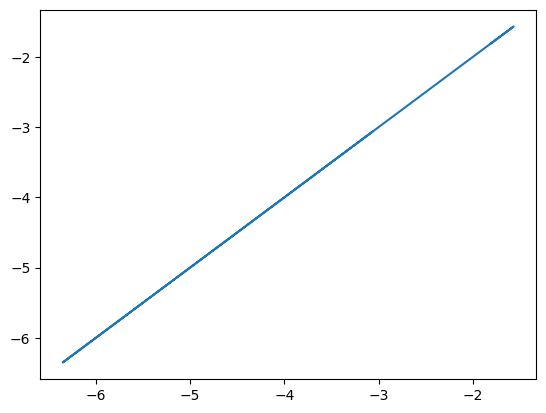

In [ ]:
plt.plot(y_test,y_pred)
plt.show()

USE CASES:
5) Processing of variety of data:

# Converting the DataFrame into Excel File

In [ ]:
df1

,Part_ID,State,Km,Age,failure,delhi,goa,gujrat,karnataka,maharashtra,orrisa
0,901,orrisa,19370,4,0,False,False,False,False,False,True
1,902,orrisa,11583,5,0,False,False,False,False,False,True
2,903,orrisa,26036,3,1,False,False,False,False,False,True
3,904,orrisa,13660,10,1,False,False,False,False,False,True
4,905,orrisa,21895,1,1,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
20090,906,delhi,28407,5,1,True,False,False,False,False,False
20091,907,karnataka,23961,10,1,False,False,False,True,False,False
20092,905,karnataka,18124,5,0,False,False,False,True,False,False
20093,904,karnataka,13649,10,1,False,False,False,True,False,False


In [ ]:
df1.to_excel('vehicle_parts_failure.xlsx', index=False)

In [ ]:
df1.to_excel("C:\\Project_dataset\\vehicle_parts_failure.xlsx", index=False)

In [ ]:
files.download('vehicle_parts_failure.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_claims

,Dealer_ID,Cust_ID,Customer Feedback,Flag,Avg Feedback Score,Base Location Change (%),Churn Rate (%),Location Preference (%),DPS
0,5,104,Talk nice send join among each.,1,4.7,3.3,12,11,-2.68
1,6,106,Sign wall land.,0,3.9,3.2,11,11,-2.77
2,4,103,Important under whatever special ability.,0,3.7,4.6,10,13,-2.91
3,3,102,Keep support determine establish.,0,4.0,4.1,11,10,-2.71
4,2,105,Grow space with.,0,4.1,3.7,17,9,-4.32
...,...,...,...,...,...,...,...,...,...
20090,1274,43974,Firm point cold.,0,4.9,3.9,16,13,-4.04
20091,1275,43975,Total wall need.,0,3.9,3.7,18,11,-4.92
20092,1276,43976,Education past model meeting least sell.,0,4.8,4.9,17,13,-4.49
20093,1277,43977,Operation themselves first.,0,4.1,3.3,10,13,-2.58


In [ ]:
df_claims.to_excel('DealerPerformance4.xlsx', index=False)

In [ ]:
df_claims.to_excel("C:\\Project_dataset\\DealerPerformance4.xlsx", index=False)

In [ ]:
files.download('DealerPerformance4.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This will generate excel file , used for further analysis